In [34]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

## 2.1 Plot $y = -3x^2 + 72x + 70$.

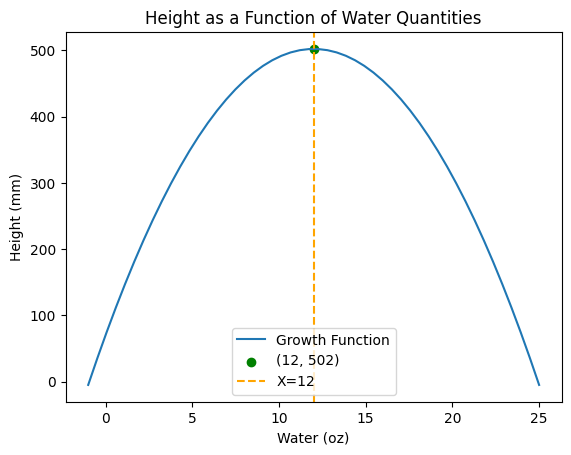

In [30]:
# Your code here
x = np.linspace(-1, 25)
y = ((-3) * x ** 2) + (72 * x) + 70
plt.plot(x, y, label="Growth Function")
plt.scatter(12, 502, color="green", label="(12, 502)")
plt.axvline(12, color="orange", linestyle="dashed", label="X=12")
plt.xlabel("Water (oz)")
plt.ylabel("Height (mm)")
plt.title("Height as a Function of Water Quantities")
plt.legend()
plt.show()

## 2.3 Plot $f(x_1, x_2)$.

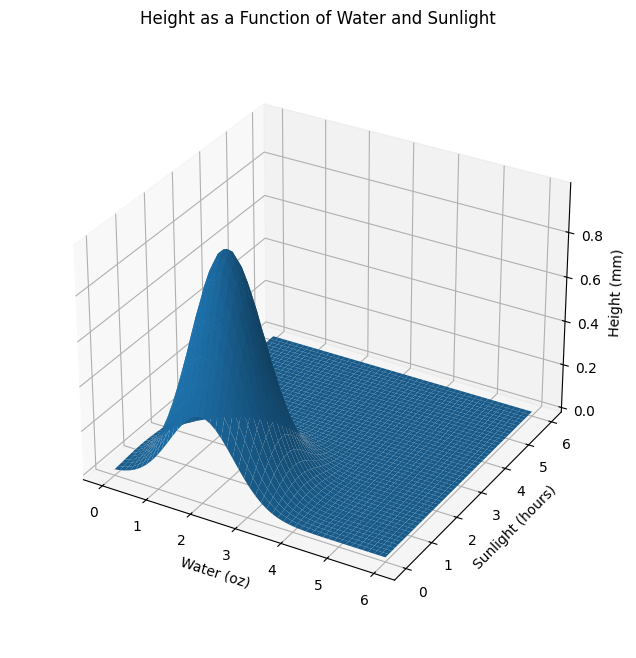

In [54]:
# Your code here
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_box_aspect(aspect=None, zoom=0.9)

water = np.linspace(0, 6)
sunlight = np.linspace(0, 6)
water, sunlight = np.meshgrid(water, sunlight)
z = np.exp(-(water - 2)**2-(sunlight - 1)**2)

ax.set_xlabel("Water (oz)")
ax.set_ylabel("Sunlight (hours)")
ax.set_zlabel("Height (mm)")
ax.set_title("Height as a Function of Water and Sunlight")


surf = ax.plot_surface(water, sunlight, z)
plt.show()

## 3.1(a) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

In [5]:
# Your code here

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

In [6]:
# Your code here

## 3.5(a) Function to simulate draws from $T^{*}$.

In [7]:
# Your code here

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [8]:
# Your code here